The Nobel Prize is one of the most prestigious awards since it has been established in 1901. Every year, awards are bestowed in multiple categories and in addition to the honor, the recipied recieves money and a gold medal with an image of Alfred Nobel, who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, I had the chance to explore and answer several questions related to the Nobel prize data.

In [220]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [221]:
nobel_prizes = pd.read_csv('data/nobel.csv')

# preview data
nobel_prizes.head() 

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


What is the most commonly awarded gender and birth country? (Male, USA)

In [222]:
top_gender = nobel_prizes['sex'].mode() 
top_gender = top_gender[0]

top_country = nobel_prizes['birth_country'].mode()
top_country = top_country[0]

print('The most commonly awarded gender and birth country is ' + top_gender + ' and ' + top_country + ', respectively.' )

The most commonly awarded gender and birth country is Male and United States of America, respectively.


What decade had the highest proportion of US-born winners? 
- 2000

In [223]:
nobel_prizes['decade'] = (np.floor(nobel_prizes['year'] / 10) * 10).astype(int)
nobel_prizes['is_usa_winner'] = nobel_prizes['birth_country'] == 'United States of America'

proportion_of_us_winners = nobel_prizes.groupby('decade', as_index=False)['is_usa_winner'].mean()

max_proportion = proportion_of_us_winners[proportion_of_us_winners['is_usa_winner'] == proportion_of_us_winners['is_usa_winner'].max()]

Text(0.5, 1.03, 'The proportion of USA Noble Prize winner per decade')

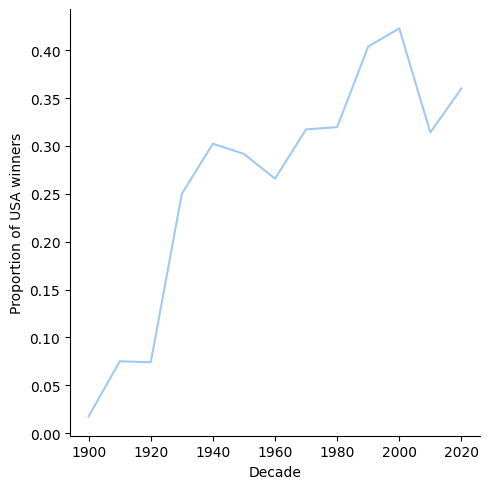

In [224]:
max_decade_usa = max_proportion['decade'].iloc[0]

a = sns.relplot(kind='line', data=proportion_of_us_winners, x='decade', y='is_usa_winner')
a.set(xlabel='Decade', ylabel='Proportion of USA winners')
g.fig.suptitle('The proportion of USA Noble Prize winner per decade', y=1.03)


What decade and category pair had the highest proportion of female laureates? 
- The literature category of year 2020 had the most female laureates.

Text(0.5, 1.03, 'The proportion of female Noble Prize winners per decade for each category')

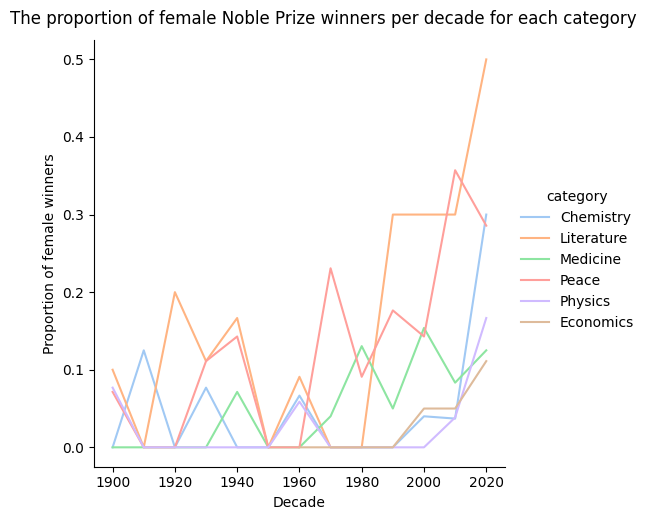

In [225]:
nobel_prizes['is_female'] = nobel_prizes['sex'] == 'Female'
proportion_female = nobel_prizes.groupby(['decade', 'category'], as_index=False)['is_female'].mean()

max_decade_category = proportion_female[proportion_female['is_female'] == proportion_female['is_female'].max()]

max_female_dict = {max_decade_category['decade'].iloc[0] : max_decade_category['category'].iloc[0]}

g = sns.relplot(kind='line', data=proportion_female, x='decade', y='is_female', hue='category')
g.set(xlabel='Decade', ylabel='Proportion of female winners')
g.fig.suptitle('The proportion of female Noble Prize winners per decade for each category', y=1.03)


Who was the first woman to receive a Nobel Prize, and in what category?
- Marie Curie won the first Nobel Prize. It was for the Physics category

In [226]:
female_only = nobel_prizes[nobel_prizes['sex'] == 'Female'].sort_values('year', ascending=True)
first_woman_name = female_only['full_name'].iloc[0]
first_woman_category = female_only['category'].iloc[0]
print('The first woman to win a Nobel prize was ' + first_woman_name + ' for category ' + first_woman_category + ' in the year of ' + str(female_only['year'].iloc[0]) +'.')

The first woman to win a Nobel prize was Marie Curie, née Sklodowska for category Physics in the year of 1903.


Which individuals or organizations have won multiple Nobel Prizes throughout the years?

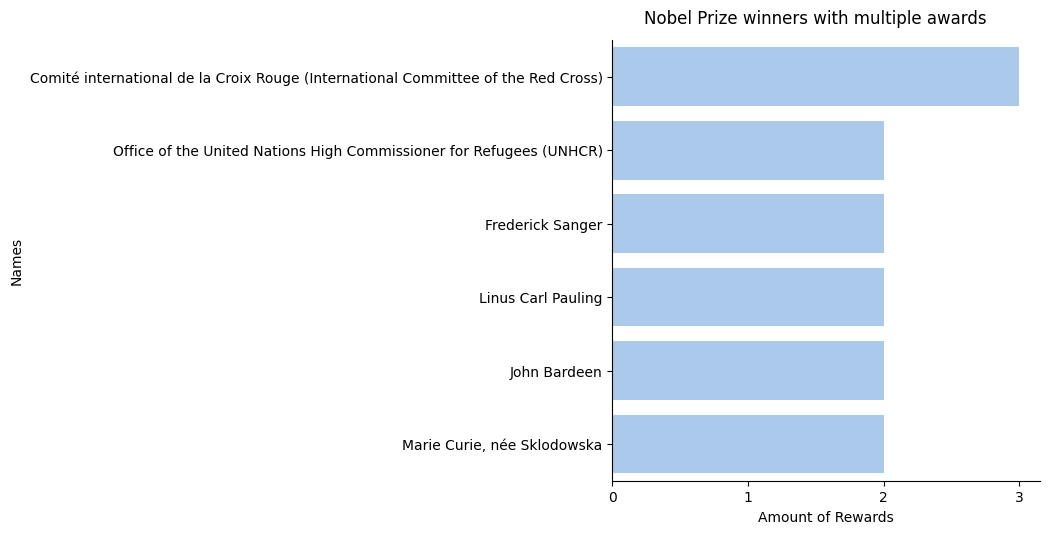

In [227]:
count_of_names = nobel_prizes.value_counts('full_name').to_frame(name='count')
repeated_names = count_of_names[count_of_names['count'] > 1]
repeated_names

b = sns.catplot(y='full_name', x='count', data=repeated_names, kind='bar')
b.set(ylabel='Names', xlabel='Amount of Rewards')
b.fig.suptitle('Nobel Prize winners with multiple awards', y=1.02)
plt.xticks([0, 1, 2, 3])
plt.show()